In [1]:
from image_processor import ImageProcessor
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
def plot_images(colors, processed_image):
    """
    Plot a horizontal bar of colors and an image below it.
    
    Parameters:
        colors (list): A list of RGB colors, where each color is a list of three integers.
        processed_image (ndarray): The processed image to display.
    """
    # Create the figure and subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column layout

    # Plot the horizontal bar of colors
    num_colors = len(colors)
    axes[0].imshow(
        np.ones((1, num_colors, 3), dtype=np.uint8) * np.array(colors, dtype=np.uint8).reshape(1, -1, 3)
    )
    axes[0].axis('off')  # Turn off the axes
    axes[0].set_title("Dominant Colors")

    # Plot the processed image
    axes[1].imshow(processed_image)
    axes[1].axis('off')  # Turn off the axes
    axes[1].set_title("Processed Image")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [3]:
processor = ImageProcessor()

--------------


Test 5: Metadata Extraction

In [4]:
with open('images/demo/test_image.jpg', 'rb') as f:
    image_data = f.read()
metadata = processor.extract_metadata(image_data)
required_keys = {'dimensions', 'color_space', 'format', 'size_bytes', 'dominant_colors'}
assert all(key in metadata for key in required_keys)
assert len(metadata['dominant_colors']) > 0

In [5]:
metadata

{'dimensions': (2500, 1875),
 'color_space': 'RGB',
 'format': 'JPEG',
 'size_bytes': 104348,
 'dominant_colors': array([[ 52, 137, 223],
        [232, 239, 247],
        [148, 150,  58]])}

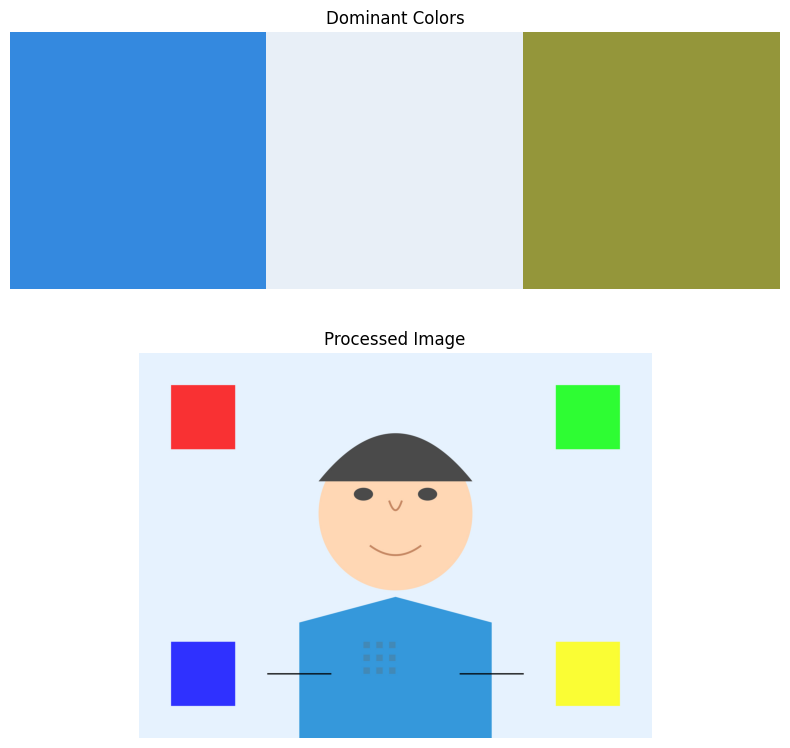

In [6]:
plot_images(metadata['dominant_colors'], Image.open(BytesIO(image_data)))